### Exercise 1

In [ ]:
library(dplyr)
require(ggplot2)
require(reshape2)
require(tidyverse)
library('ggplot2')
library('latex2exp')
library("gridExtra")
library(DescTools)
library(plot3D)

In [2]:
numExtreme <- function(c, p, q) {
    x <- cumsum(c)/100
    r <- 0
    for (i in 1:(length(x)-1)) {
        if (x[i]<q & x[i+1]>q) {
            r <- p[i+1]
        }
    }
    return(r)
    
    
} 


F.likelihood <- function(data, mu) {
   return(apply(sapply(data,dpois, mu), 1, prod))
  

}

F.posterior <- function(data, mu) {
    return(F.likelihood(data, mu)/
          integrate(F.likelihood, lower=0, upper=10, data=data)$value)
}

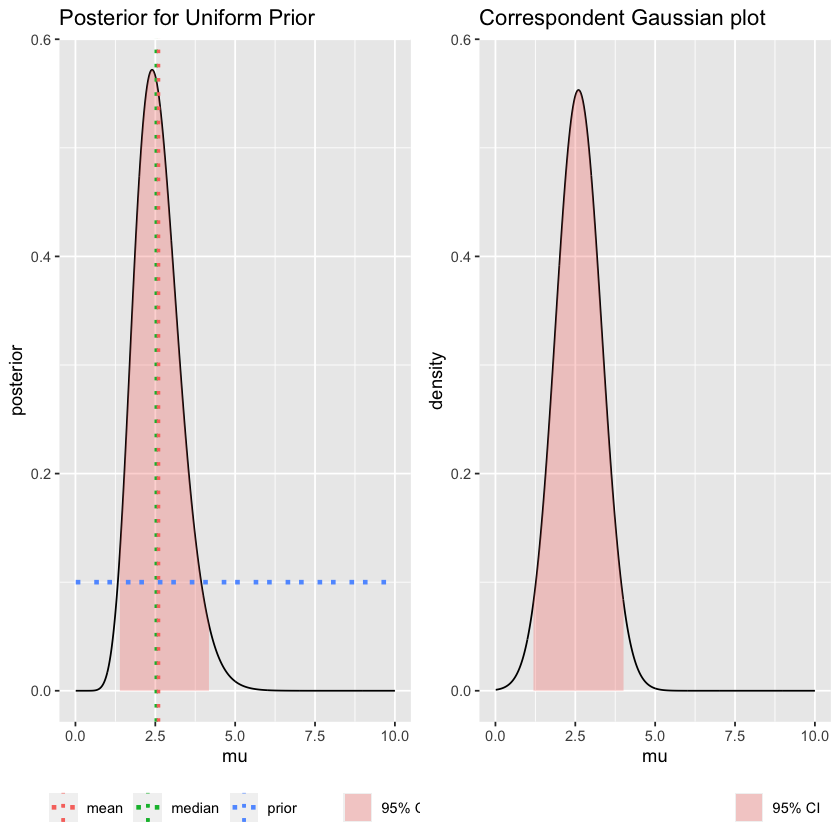

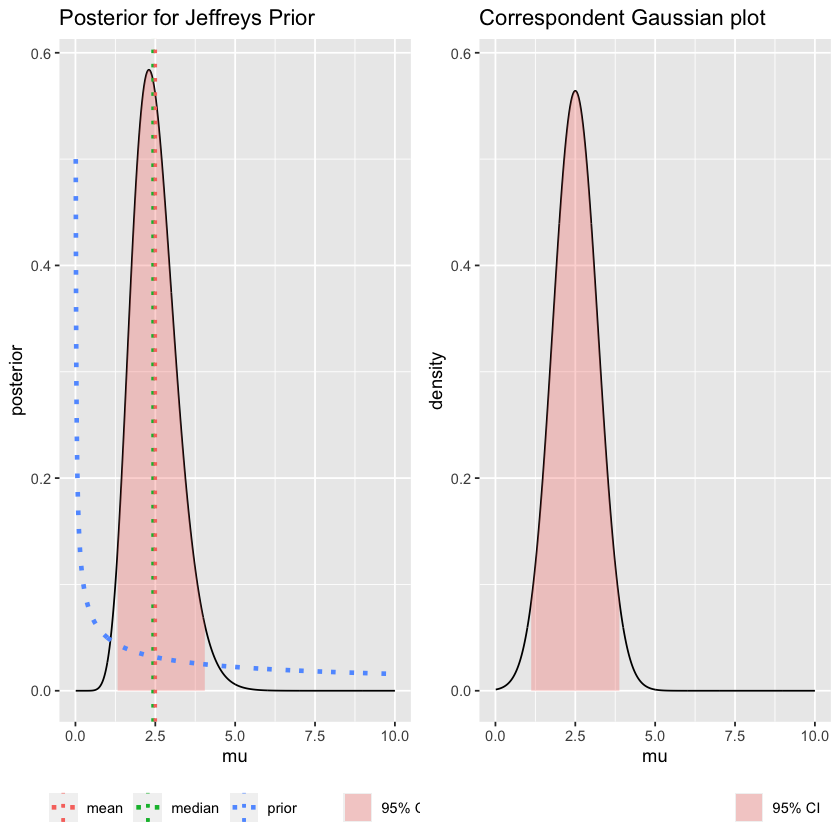

In [10]:
data <- c(4,1,3,1,3)
mu <- seq(0.01, 10, len=1000)

priors <- rbind(dunif(mu, min=0, max=10), 1/(20*sqrt(mu)))
alphas<- c(sum(data)+1, sum(data)+1/2)
title <-c('Posterior for Uniform Prior', 
         'Posterior for Jeffreys Prior')
n=length(data)

for (i in 1:2) {
    
posterior <- dgamma(mu, shape=alphas[i], rate=n)
min <- numExtreme(posterior, p=mu, q=0.025)
max <- numExtreme(posterior, p=mu, q=0.975)

mean.Th <- alphas[i]/n
variance.Th <- alphas[i]/n^2
mean.Num <- sum(posterior*mu)/100
variance.Num <- sum(posterior*mu^2)/10-mean.Num
median <-numExtreme(posterior, p=mu, q=0.5)

plot1 <- ggplot()+geom_line(aes(x=mu, y=posterior))+
geom_area(aes(x = ifelse(mu>min & mu<max, mu, 0),
          y=posterior, fill='95% CI'), alpha=0.3)+
ylim(0, max(posterior))+
geom_vline(aes(xintercept = median, color='median'), linetype="dotted", size=1)+
geom_vline(aes(xintercept = mean.Th, color='mean'), linetype="dotted", size=1)+
geom_line(aes(x=mu, y=priors[i, ], color='prior'), linetype='dotted', size=1.3)+
    theme(
    legend.position="bottom",
    legend.justification = c("right", "top"))+
labs(fill='', colour='', title=title[i])
    

plot2 <-ggplot ()+
geom_line(aes(x=mu, y=dnorm(mu, mean=mean.Th, sd=sqrt(variance.Th))))+
geom_area(aes(x = ifelse(mu>qnorm(p=0.025, mean=mean.Th, sd= sqrt(variance.Th)) 
                         & mu<qnorm(p=0.975, mean=mean.Th, sd= sqrt(variance.Th)), 
                         mu, 0),
          y=dnorm(mu, mean=mean.Th, sd=sqrt(variance.Th)), fill='95% CI'), alpha=0.3)+
ylim(0, max(posterior))+
    theme(
    legend.position="bottom",
    legend.justification = c("right", "top"))+
labs(y='density', fill='', title='Correspondent Gaussian plot')


grid.arrange(plot1, plot2, ncol=2)

}




### Exercise 2

In [11]:
set.seed(123)
n <- 100
data <- rcauchy(n=n, loc=1, scale=1)


alpha.min <- -6
alpha.max <- 6
delta.a <- (alpha.max - alpha.min) / n
alphas <- seq(from=alpha.min, by=delta.a, length.out=n+1)

beta.min <- 0.001
beta.max <- 5.001
delta.b <- beta.max / n
betas <- seq(from=beta.min, by=delta.b, length.out=n+1)


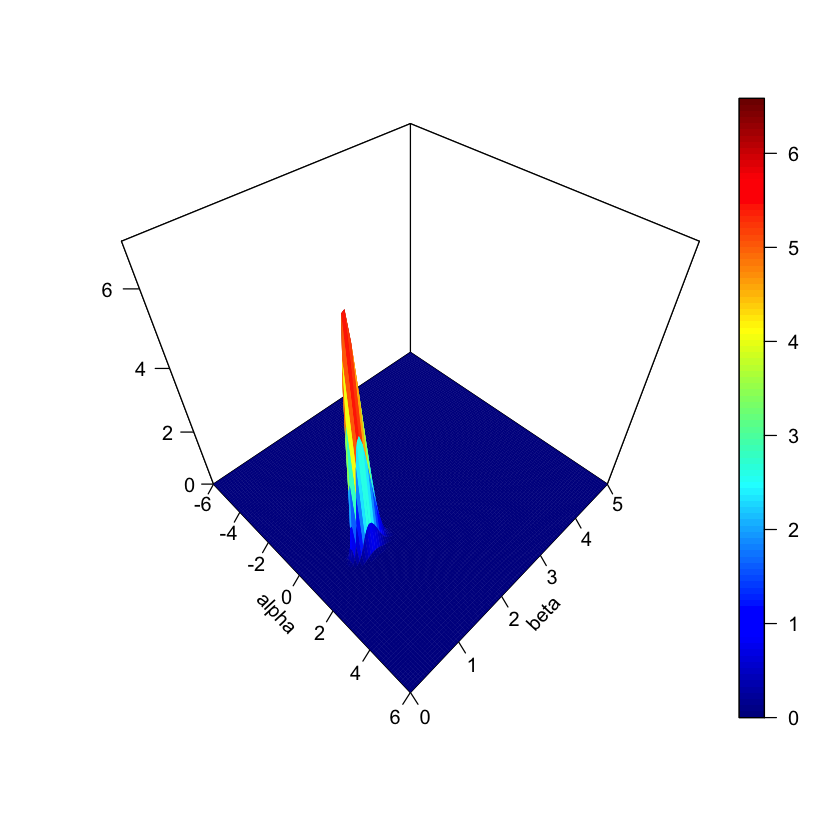

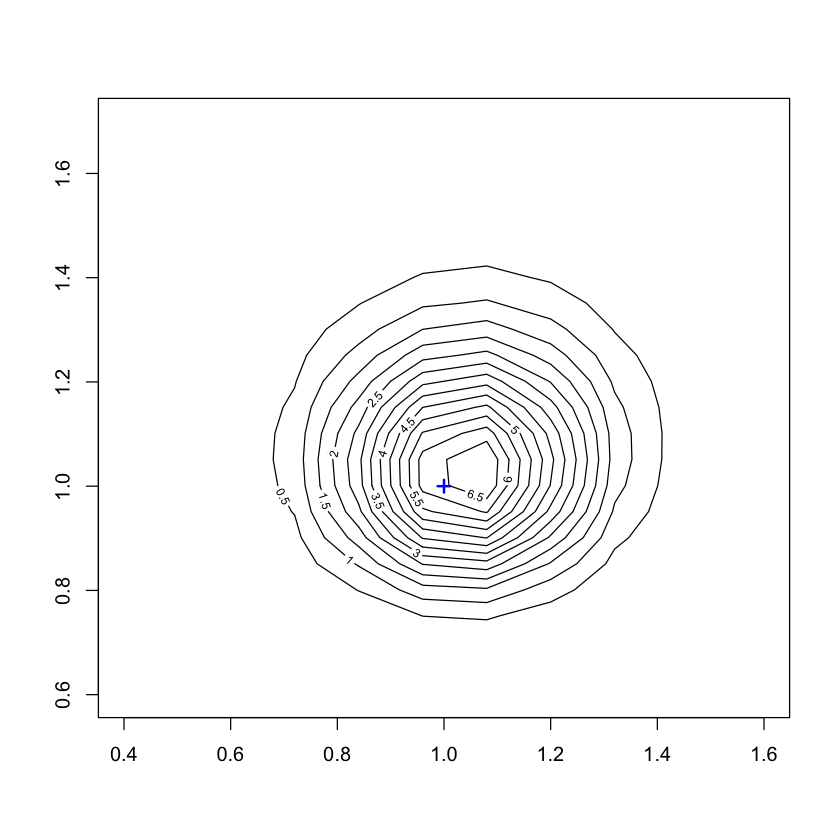

In [12]:
log_joint_posterior.F <- function (x_k, alfa, beta) {
    
  sum( log((beta/pi) / (beta^2 + (x_k - alfa)^2)) )
}

f <- function(a,b) log_joint_posterior.F(data, a, b)

log_joint_posterior <- outer(alphas, betas, Vectorize(f))
joint_posterior_star <- exp(log_joint_posterior)
joint_posterior <- joint_posterior_star/
                    (delta.a*delta.b*sum(joint_posterior_star))


plot1<- persp3D(x=alphas, y=betas, z=joint_posterior, 
        ticktype='detailed',
        xlab='alpha', ylab='beta', zlab="",
        xlim=c(-6,6), ylim=c(0,5), zlim=c(0,max(joint_posterior)),
      theta=45, phi=45

       )

plot2 <- contour(alphas, betas, joint_posterior, xlim=c(0.4, 1.6), ylim=c(0.6,1.7))+
points(1,1, pch=3, col="blue", lwd=2) 




Above we report the graph of the posterior over the whole dataset.
Below we report the sequential analysis over the first 1,2,5,10,50,70,100 data.

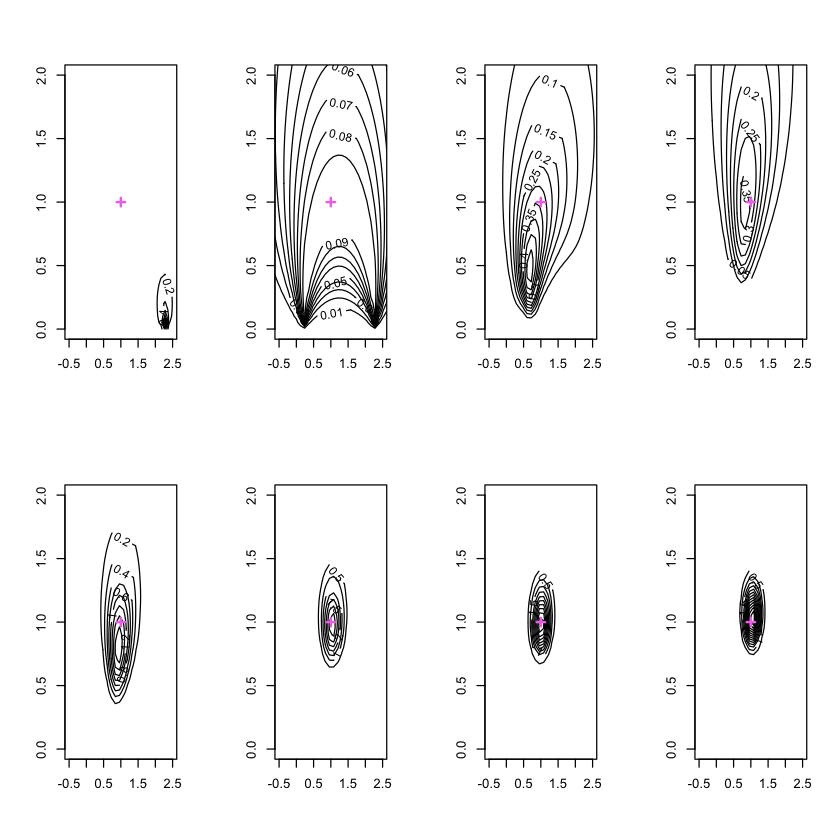

In [13]:
sequential <- c(1,2,5,10,20,50,70, 100)

par(mfrow = c(2,4))
for (n in sequential) {
    
    dt <- data[1:n]
f <- function(a,b) log_joint_posterior.F(x_k=dt, a, b)

log_joint_posterior <- outer(alphas, betas, Vectorize(f))
joint_posterior_star <- exp(log_joint_posterior)
joint_posterior <- joint_posterior_star/
                    (delta.a*delta.b*sum(joint_posterior_star))


plot <-contour(alphas, betas, joint_posterior, xlim=c(-0.5, 2.5), ylim=c(0,2))+
points(1,1, pch=3, col="orchid2", lwd=2)

    
}








### Exercise 3

In [1]:
signal <- function(x,a,b,x0,w,t) {
    t * (a * exp(-(x-x0)^2/(2*w^2))+b)
}




log.post <- function(d, x, a, b, x0, w, t) {
if(a<0 || b <0) {return(-Inf)} # the effect of the prior 
    sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
}

 


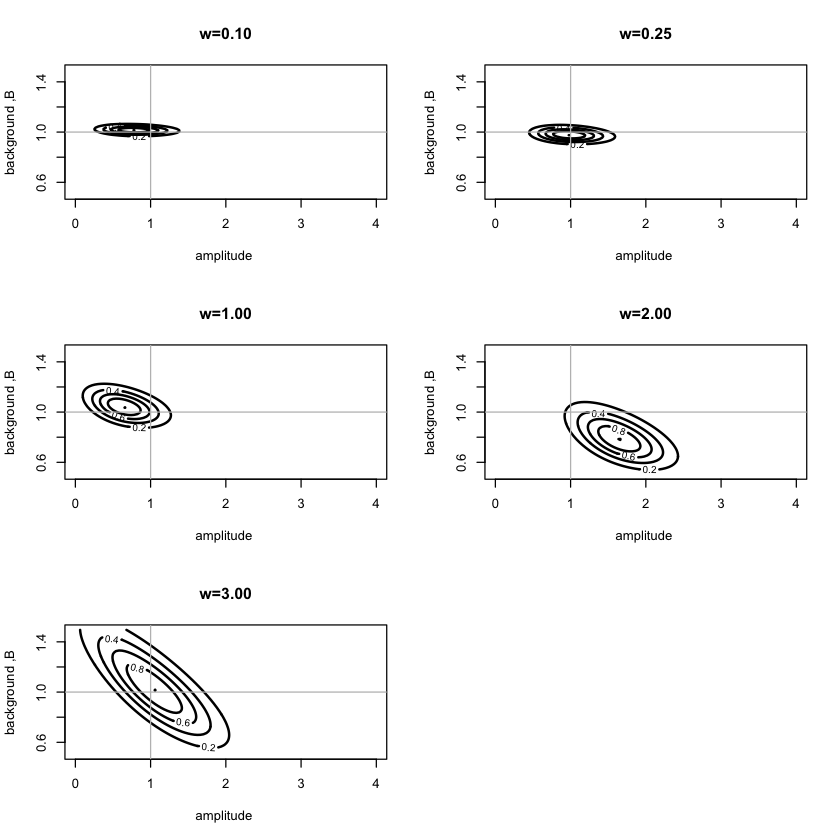

In [2]:
x0 <-0
ws <- c(0.1, 0.25, 1,2,3)
A.true <- 1
B.true <- 1
Delta.t <- 5
set.seed(123)


par(mfrow = c(3,2))


for (w in ws) {
    
    
xdat <- seq(from=-7, to=7, by=0.5*w)

s.true <- signal(xdat, A.true, B.true, x0, w, Delta.t) 
ddat <- rpois(length(s.true), s.true)
xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
splot <- signal(xplot, A.true, B.true, x0, w, Delta.t) 
 
    


Nsamp <- 100
unigrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp)


a.min <- 0.0
a.max <- 4.0
delta.a <- (a.max - a.min) / Nsamp
a <- a.min + (a.max - a.min)*unigrid

b.min <- 0.5
b.max <- 1.5
delta.b <- (b.max - b.min) / Nsamp
b <- b.min + (b.max - b.min)*unigrid

    
z<- matrix(data=NA, nrow=length(a), ncol=length(b))
 for (j in 1:length(a)) {
     for (k in 1:length(b)) {
         z[j,k] <-log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
     }
 }
z <- z-max(z)

plot <- contour(a, b, exp(z),
nlevels = 5,
labcex = 0.5,
lwd = 2, xlab="amplitude ", ylab="background ,B", main=sprintf("w=%.2f", w))
abline(v=1,h=1,col="grey")


  
}


            

Here we can see the effect of different w values: the result does not seem to express any explicit dependance on it.

Below we report an analysis of the results obtained changing A/B ratio varying the A value

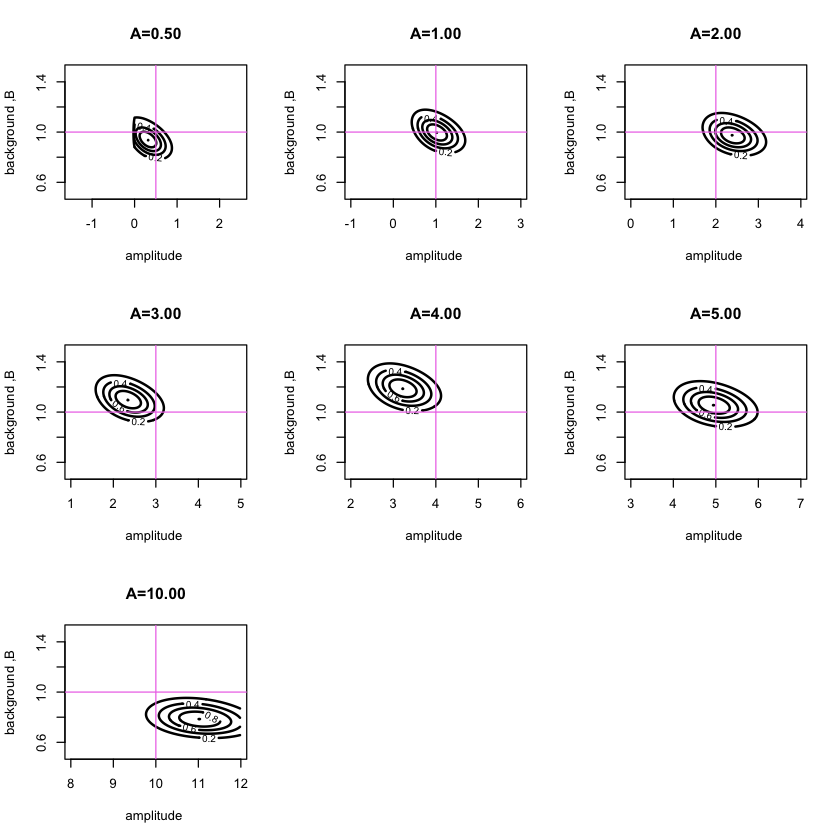

In [3]:

w <- 1
As.true <- c (0.5,1,2,3,4, 5, 10)


par(mfrow = c(3,3))



for (A.true in As.true) {
xdat <- seq(from=-7*w, to=7*w, by=0.5*w)

s.true <- signal(xdat, A.true, B.true, x0, w, Delta.t) 
ddat <- rpois(length(s.true), s.true)
xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
splot <- signal(xplot, A.true, B.true, x0, w, Delta.t) 

    


Nsamp <- 100
unigrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp)


a.min <- A.true-2
a.max <- A.true+2
delta.a <- (a.max - a.min) / Nsamp
a <- a.min + (a.max - a.min)*unigrid

b.min <- 0.5
b.max <- 1.5
delta.b <- (b.max - b.min) / Nsamp
b <- b.min + (b.max - b.min)*unigrid
    
z<- matrix(data=NA, nrow=length(a), ncol=length(b))
 for (j in 1:length(a)) {
     for (k in 1:length(b)) {
         z[j,k] <-log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
     }
 }
    
z <- z-max(z)

contour(a, b, exp(z),
nlevels = 5,
labcex = 0.5,
lwd = 2, xlab="amplitude ", ylab="background ,B", main=sprintf("A=%.2f", A.true))
abline(v=A.true,h=1,col="orchid2")


}
